# CrossValidation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/train.csv')
test = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/test.csv')

In [3]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [4]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [5]:
# Splitting data in a different way (test set 20%)

x = []
x.append(X_train)
x.append(X_test)

X = pd.concat(x)

y = []
y.append(y_train)
y.append(y_test)

Y = pd.concat(y)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2)

In [6]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [7]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
depths = np.arange(4, 18, 3)
samples= np.arange(2, 15, 3)
parameters = {'criterion':['gini', 'entropy'], 'max_depth': depths,  'min_samples_leaf':samples, 'min_samples_split':samples}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [9]:
print("Tuned Decision Tree Parameters: {}".format(dt_grid.best_params_))
print("Best Score for validation set {}".format(dt_grid.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 14}
Best Score for validation set 0.937614506516703


In [10]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
    
# calculate overall accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.9407766990291262


## Confusion Matrix


In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('\n {}'.format(cm))  

Confusion Matrix:

 [[411   0   0   0   0   0]
 [  0 359  27   1   0   0]
 [  0  24 353   0   0   0]
 [  0   0   0 300   9   5]
 [  0   0   0   8 244  23]
 [  0   0   0  12  13 271]]


### Plot Confusion Matrix

In [12]:
import matplotlib.pyplot as plt

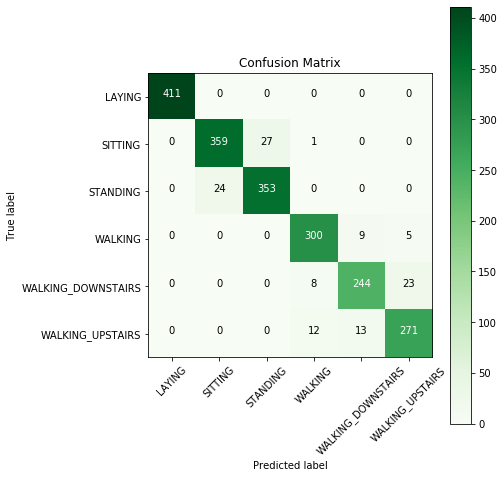

In [20]:
import itertools

plt.figure(figsize=(7,7))
plt.grid(b=False)

cmap = plt.cm.Greens
cm = cm.astype('int64')

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j]),
             horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Classification Report

In [21]:
print('| Classification Report |\n')
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

| Classification Report |

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       411
           SITTING       0.94      0.93      0.93       387
          STANDING       0.93      0.94      0.93       377
           WALKING       0.93      0.96      0.94       314
WALKING_DOWNSTAIRS       0.92      0.89      0.90       275
  WALKING_UPSTAIRS       0.91      0.92      0.91       296

          accuracy                           0.94      2060
         macro avg       0.94      0.94      0.94      2060
      weighted avg       0.94      0.94      0.94      2060

